# Los Clásicos

Aquí tenemos unos ejemplos de gráficos comunes y el código correspondiente en `altair`

#### _Gráfico de dispersión_ (aka _scatterplot_)

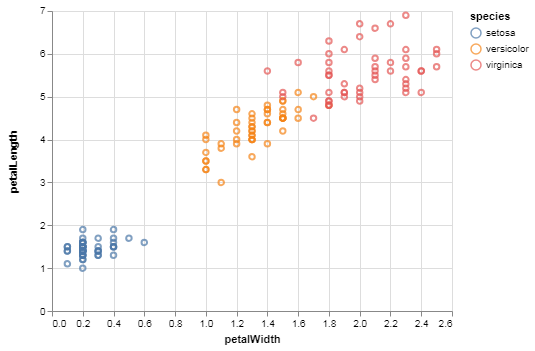

In [6]:
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species',
    tooltip='species'
)

#### _Gráfico de barras_ (aka _bar chart_)

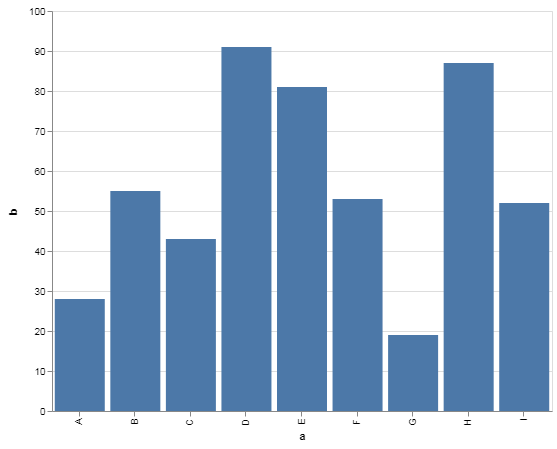

In [2]:
import altair as alt
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(data).mark_bar().encode(
    x='a',
    y='b'
).properties(
    height = 400,
    width = 500,
)

#### _Mapa de calor_ (aka _heatmap_)

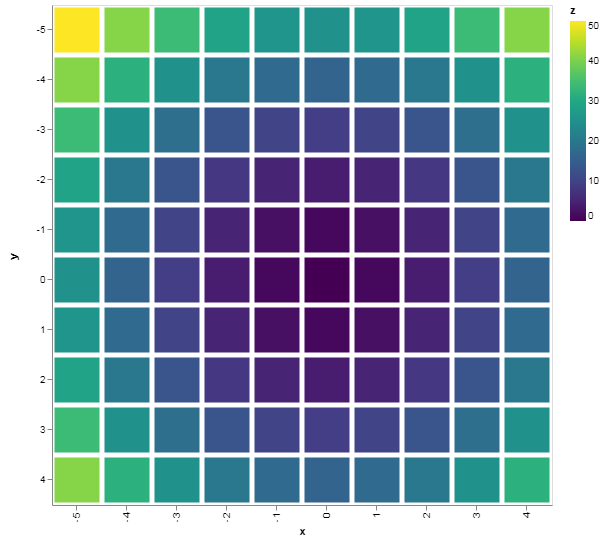

In [3]:
import altair as alt
import numpy as np
import pandas as pd

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
data = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(data).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
).properties(
    height = 500,
    width = 500
)

#### _Histograma_

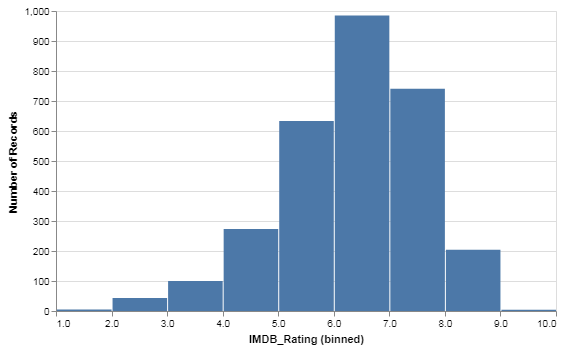

In [4]:
import altair as alt
from vega_datasets import data

movies = data.movies.url

alt.Chart(movies).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
).properties(
    width = 500,
    height = 300,
)

#### _Mapa_

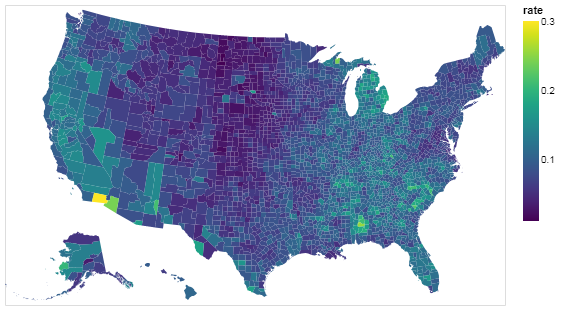

In [5]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
unemp_data = data.unemployment.url


alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)